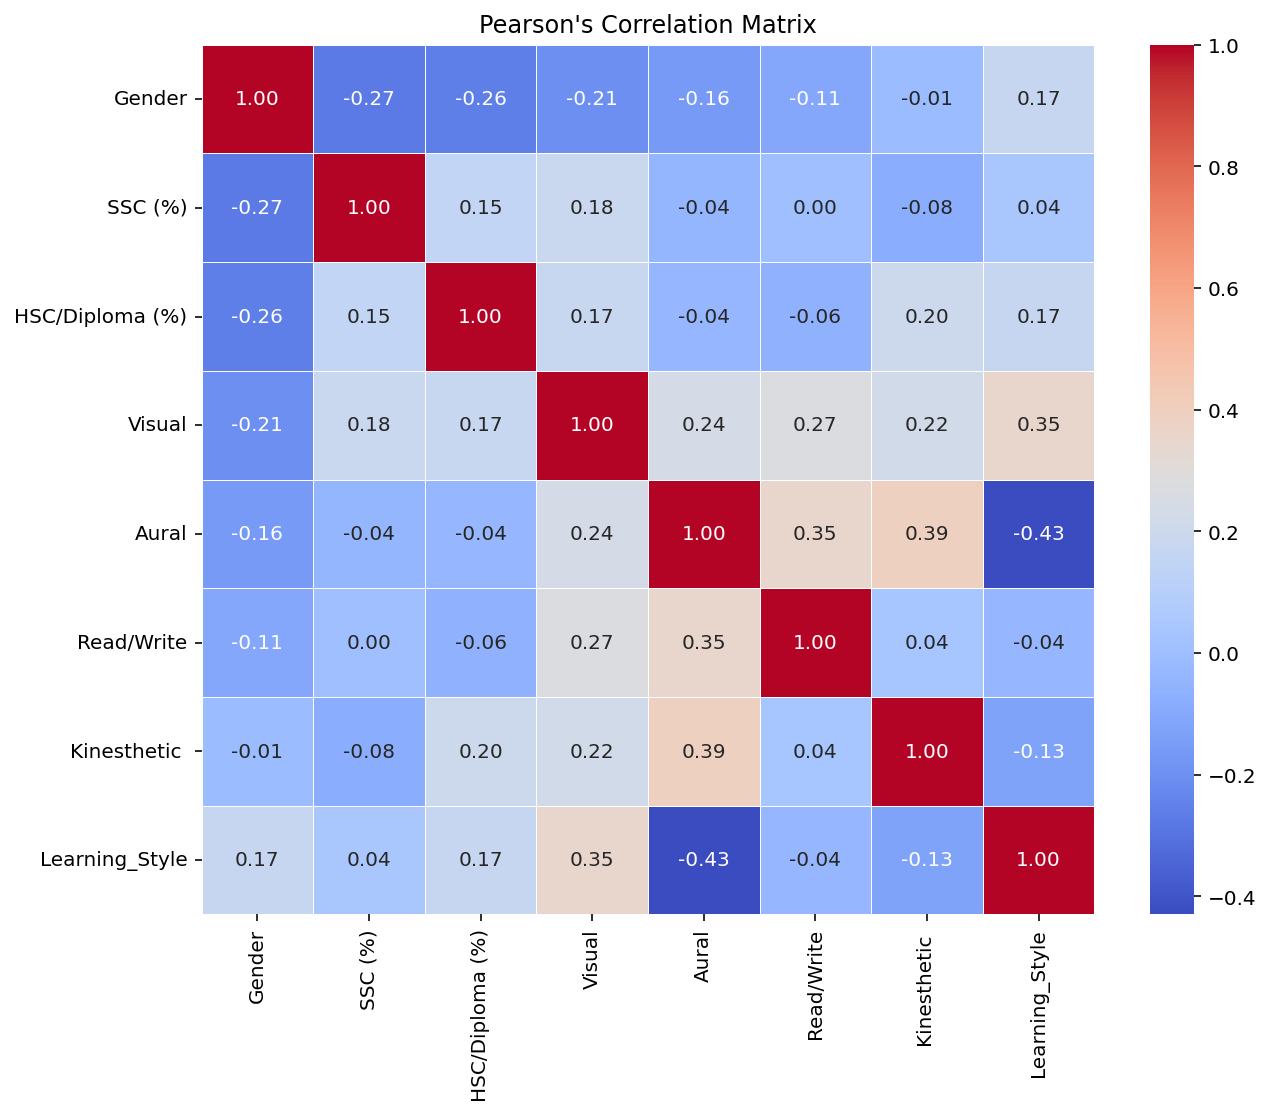

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'input_file.csv' with the path to your input CSV file
input_csv_file = 'capstone_numeric_output.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('capstone_numeric_output.csv')

# Calculate Pearson's correlation matrix
correlation_matrix = df.corr(method='pearson')

# Plot the correlation matrix as a heatmap with proper color formatting
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Pearson's Correlation Matrix")
plt.show()

In [19]:
#import ML libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier  # to establish a baseline
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, f1_score

#for model assessment
from sklearn.metrics import confusion_matrix, classification_report

#for visualization
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sn

In [20]:
df=pd.read_csv('capstone_numeric_output.csv')
print(df)

     Gender  SSC (%)  HSC/Diploma (%)  Visual  Aural  Read/Write  \
0         0     98.2            88.00      13      7          10   
1         0     92.4            93.69       9     10           6   
2         0     89.2            82.15       7      8           2   
3         0     94.4            72.00       4     10           5   
4         1     91.4            85.27      10      9           8   
..      ...      ...              ...     ...    ...         ...   
101       1     80.0            70.00      14      8           7   
102       1     81.6            60.00      15     15          14   
103       1     92.0            67.00      12     10           8   
104       1     91.6            56.40       5     12           8   
105       1     91.0            84.00       7     10          12   

     Kinesthetic   Learning_Style  
0              11               9  
1              13               5  
2              10               5  
3              11               3  
4  

In [21]:
len(df)
df.head()

,Gender,SSC (%),HSC/Diploma (%),Visual,Aural,Read/Write,Kinesthetic,Learning_Style
0,0,98.2,88.00,13,7,10,11,9
1,0,92.4,93.69,9,10,6,13,5
2,0,89.2,82.15,7,8,2,10,5
3,0,94.4,72.00,4,10,5,11,3
4,1,91.4,85.27,10,9,8,7,10


In [22]:
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'ssc (%)', 'hsc/diploma (%)', 'visual', 'aural', 'read/write',
       'kinesthetic ', 'learning_style'],
      dtype='object')

In [23]:
#split into train and test
X = df.iloc[:, 0:7]
y = df.iloc[:, 7]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [24]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

84
84
22
22


In [25]:
Logistic_Model=LogisticRegression()

In [26]:
Logistic_Model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
logr_pred = Logistic_Model.predict(X_test)


In [40]:
cm = confusion_matrix(y_test, logr_pred)
print (cm)

[[0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 3 8 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]]


In [41]:
logr= LogisticRegression(max_iter=10000)  #use max_iter so as to not stop the iteration due limits
logr.fit(X_train, y_train)
logr_predict = logr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
# logistic classification report
print (classification_report(y_test, logr_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.33      0.50      0.40         2
           3       0.40      1.00      0.57         2
           5       0.89      0.73      0.80        11
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1

    accuracy                           0.50        22
   macro avg       0.14      0.19      0.15        22
weighted avg       0.51      0.50      0.49        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [43]:
def plot_confusion_matrix(y_test, logr_predict):
    "this function plots the confusion matrix"

    conf_matrix = confusion_matrix(y_test, logr_predict)
    ax= plt.subplot()
    sns.heatmap(conf_matrix, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels', fontsize=16)
    ax.set_ylabel('True labels', fontsize=16)
    ax.set_title('Confusion Matrix', fontsize=16); 
    
    plt.show()

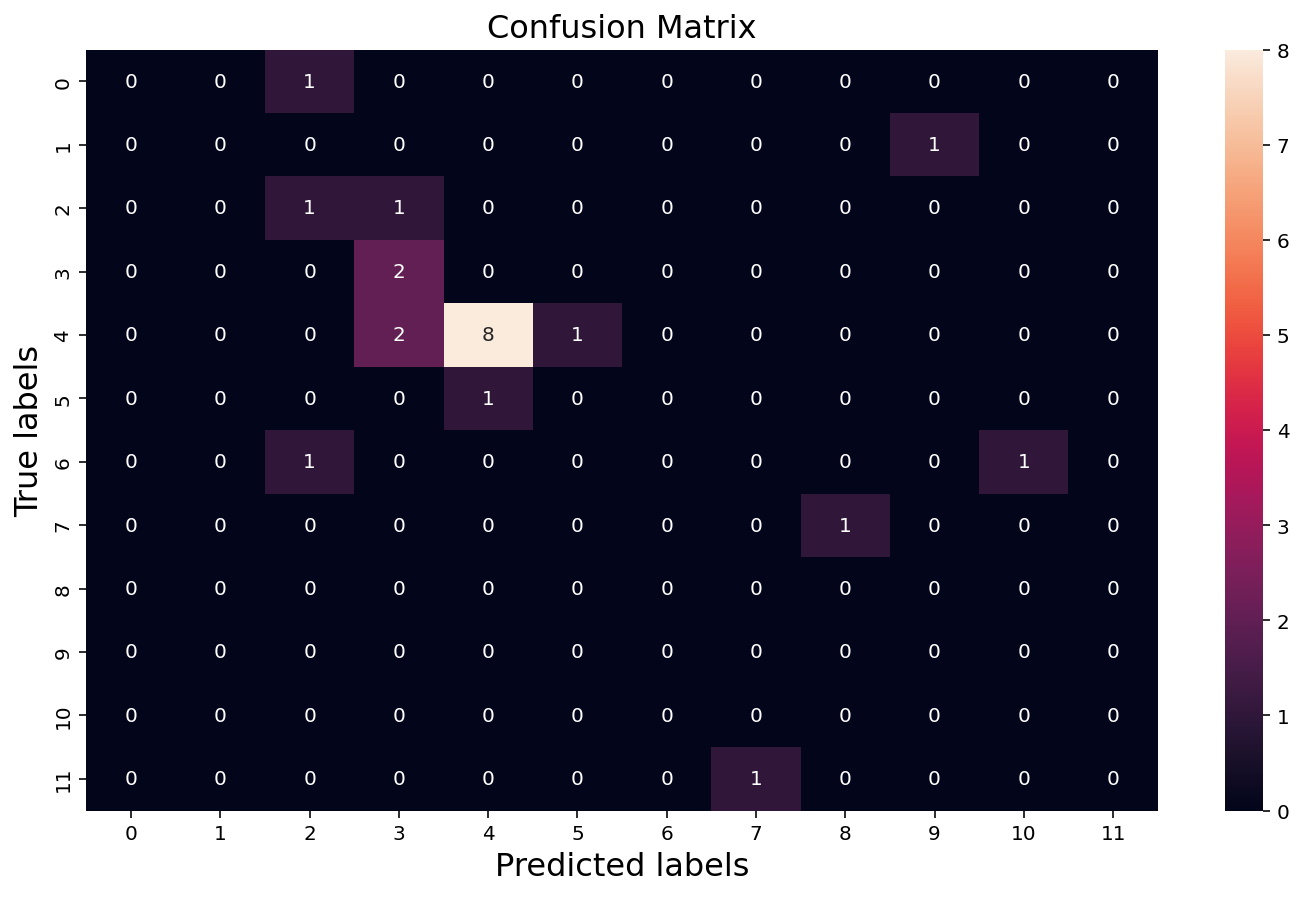

In [44]:
plot_confusion_matrix(y_test, logr_predict)

In [47]:
# Calculating accuracy, precision, and recall for each class
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Define and assign a value to the variable y_RF
logr_predict = logr.predict(X_test)

accuracy3 = accuracy_score(y_test,logr_predict)
precision3 = precision_score(y_test,logr_predict , average='weighted')
recall3 = recall_score(y_test,logr_predict, average='weighted')

print(f"Accuracy: {accuracy3:.4f}")
print(f"Precision: {precision3:.4f}")
print(f"Recall: {recall3:.4f}")

# Additional: Classification report showing precision, recall, f1-score for each class
class_report = classification_report(y_test,logr_predict)
#print("\nClassification Report:")
#print(class_report) 

Accuracy: 0.5000
Precision: 0.5111
Recall: 0.5000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWa

In [48]:
tree = DecisionTreeClassifier()
tree.fit (X_train, y_train)
tree_predict = tree.predict(X_test)

In [52]:
tree_predict=tree.predict(X_test)

print(tree_predict)

print(y_test)

[ 5  4  5  3  6  3  3 12  5  2  5  5  5  3  5  3  5  0  5  3  9  3]
99      6
10      3
75      5
2       5
24      5
98     16
105     8
7       3
16      5
85      0
68      5
22      5
45      5
60      1
76      8
52      5
13      5
73      2
84      5
54      2
101     9
8       5
Name: learning_style, dtype: int64


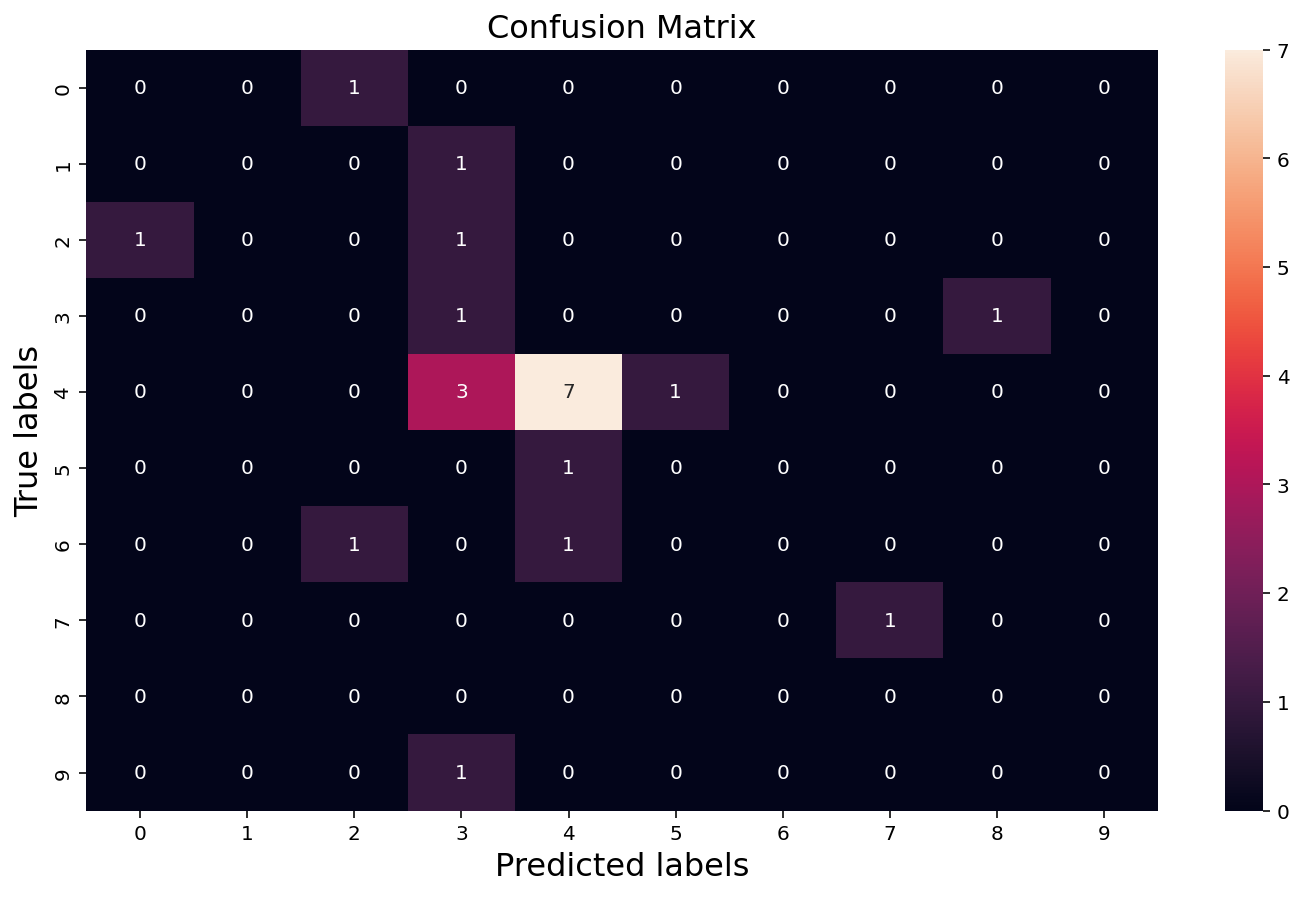

In [49]:
plot_confusion_matrix(y_test, tree_predict)

In [50]:
#Decision Tree

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Define and initialize the decision tree classifier
tree = DecisionTreeClassifier()

# Fit the decision tree classifier on the training data
tree.fit(X_train, y_train)# Calculating accuracy, precision, and recall for each class
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Define and assign a value to the variable y_RF
tree_predict = tree.predict(X_test)

accuracy1 = accuracy_score(y_test, tree_predict)
precision1 = precision_score(y_test, tree_predict, average='weighted')
recall1 = recall_score(y_test, tree_predict, average='weighted')

print(f"Accuracy: {accuracy1:.4f}")
print(f"Precision: {precision1:.4f}")
print(f"Recall: {recall1:.4f}")

# Additional: Classification report showing precision, recall, f1-score for each class
class_report = classification_report(y_test, tree_predict)
print("\nClassification Report:")
print(class_report) 

Accuracy: 0.3636
Precision: 0.4343
Recall: 0.3636

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           5       0.78      0.64      0.70        11
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1

    accuracy                           0.36        22
   macro avg       0.16      0.15      0.15        22
weighted avg       0.43      0.36      0.40        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWa

In [23]:
#Random Forest

forest = RandomForestClassifier()
forest.fit (X_train, y_train)
forest_predict = forest.predict(X_test)

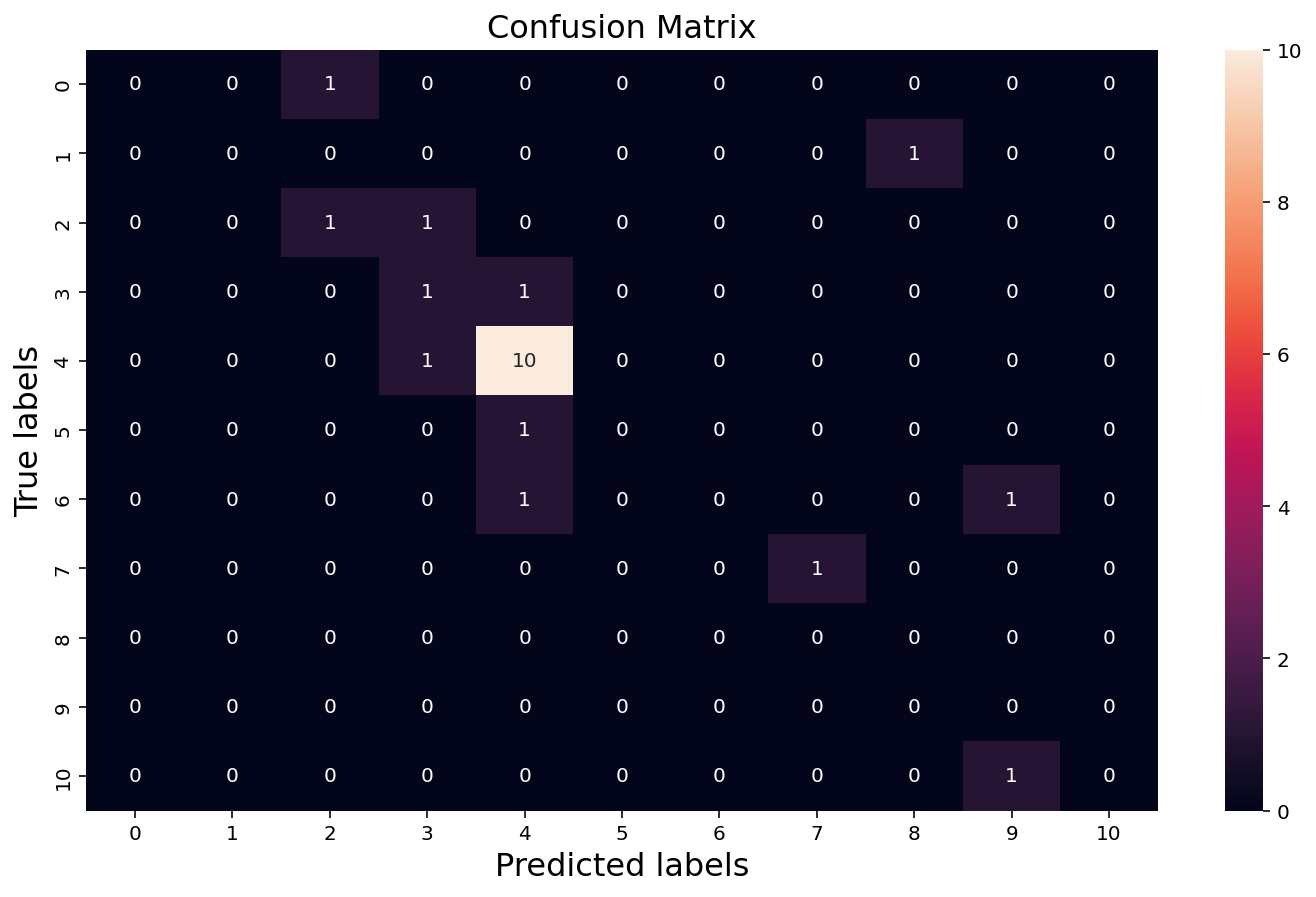

In [24]:
plot_confusion_matrix(y_test, forest_predict)

In [25]:
# Calculating accuracy, precision, and recall for each class
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Define and assign a value to the variable y_RF
forest_predict = forest.predict(X_test)

accuracy2 = accuracy_score(y_test,forest_predict)
precision2 = precision_score(y_test,forest_predict , average='weighted')
recall2 = recall_score(y_test,forest_predict, average='weighted')

print(f"Accuracy: {accuracy2:.4f}")
print(f"Precision: {precision2:.4f}")
print(f"Recall: {recall2:.4f}")

# Additional: Classification report showing precision, recall, f1-score for each class
class_report = classification_report(y_test,forest_predict)
print("\nClassification Report:")
print(class_report) 

Accuracy: 0.5909
Precision: 0.5058
Recall: 0.5909

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.50      0.50      0.50         2
           3       0.33      0.50      0.40         2
           5       0.77      0.91      0.83        11
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1

    accuracy                           0.59        22
   macro avg       0.24      0.26      0.25        22
weighted avg       0.51      0.59      0.54        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWa

In [26]:
#KNN 

from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Make predictions
knn_predict = knn.predict(X_test)

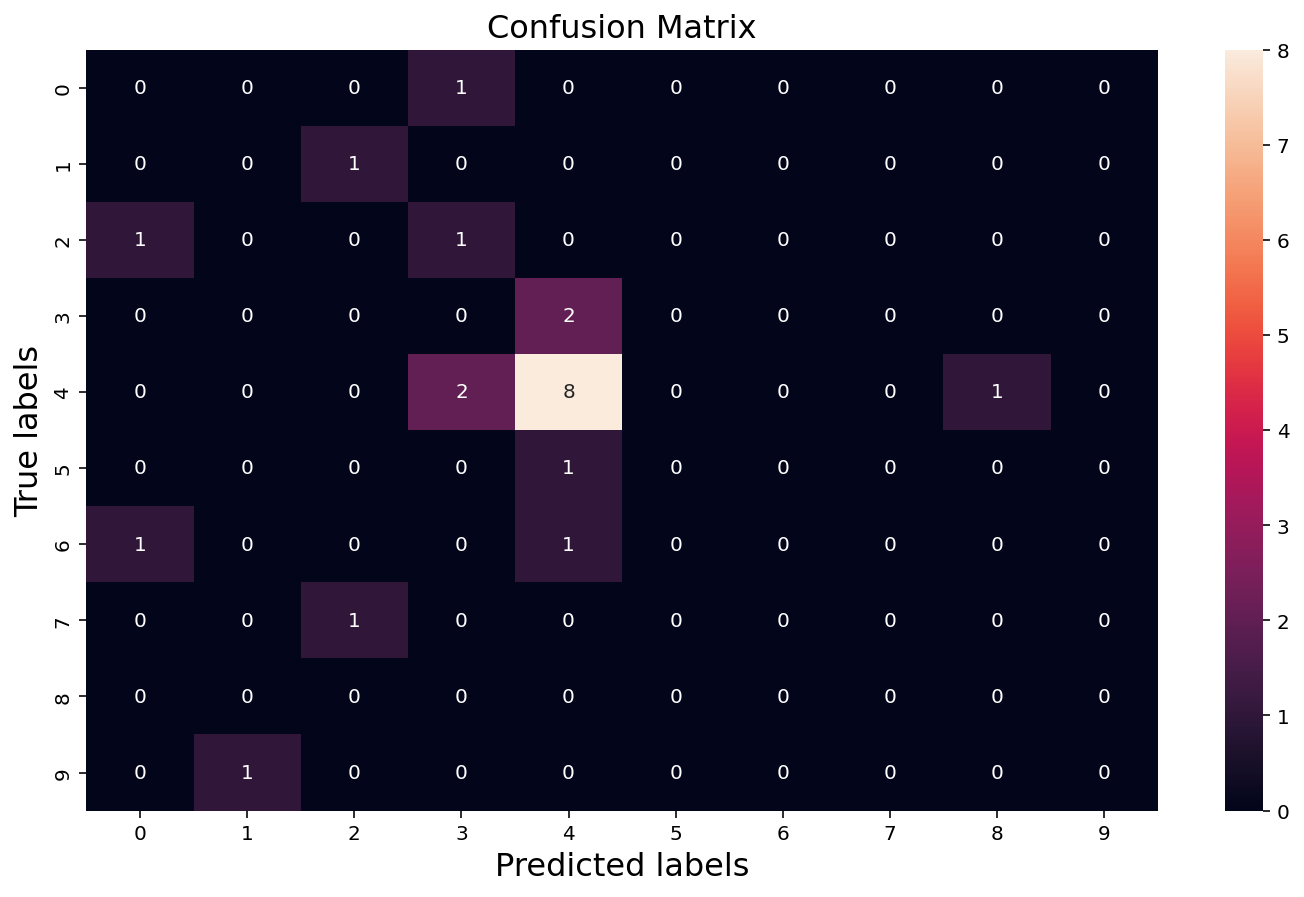

In [28]:
plot_confusion_matrix(y_test, knn_predict)

In [30]:
# Calculating accuracy, precision, and recall for each class
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Define and assign a value to the variable y_RF
knn_predict = knn.predict(X_test)

accuracy3 = accuracy_score(y_test,knn_predict)
precision3 = precision_score(y_test,knn_predict , average='weighted')
recall3 = recall_score(y_test,knn_predict, average='weighted')

print(f"Accuracy: {accuracy3:.4f}")
print(f"Precision: {precision3:.4f}")
print(f"Recall: {recall3:.4f}")

# Additional: Classification report showing precision, recall, f1-score for each class
class_report = classification_report(y_test,knn_predict)
print("\nClassification Report:")
print(class_report) 

Accuracy: 0.3636
Precision: 0.3333
Recall: 0.3636

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           5       0.67      0.73      0.70        11
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1

    accuracy                           0.36        22
   macro avg       0.07      0.07      0.07        22
weighted avg       0.33      0.36      0.35        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWa

In [31]:
#SVM

from sklearn.svm import SVC

# Create SVM classifier
svm = SVC()

# Train the model
svm.fit(X_train, y_train)

# Make predictions
svm_predict = svm.predict(X_test)

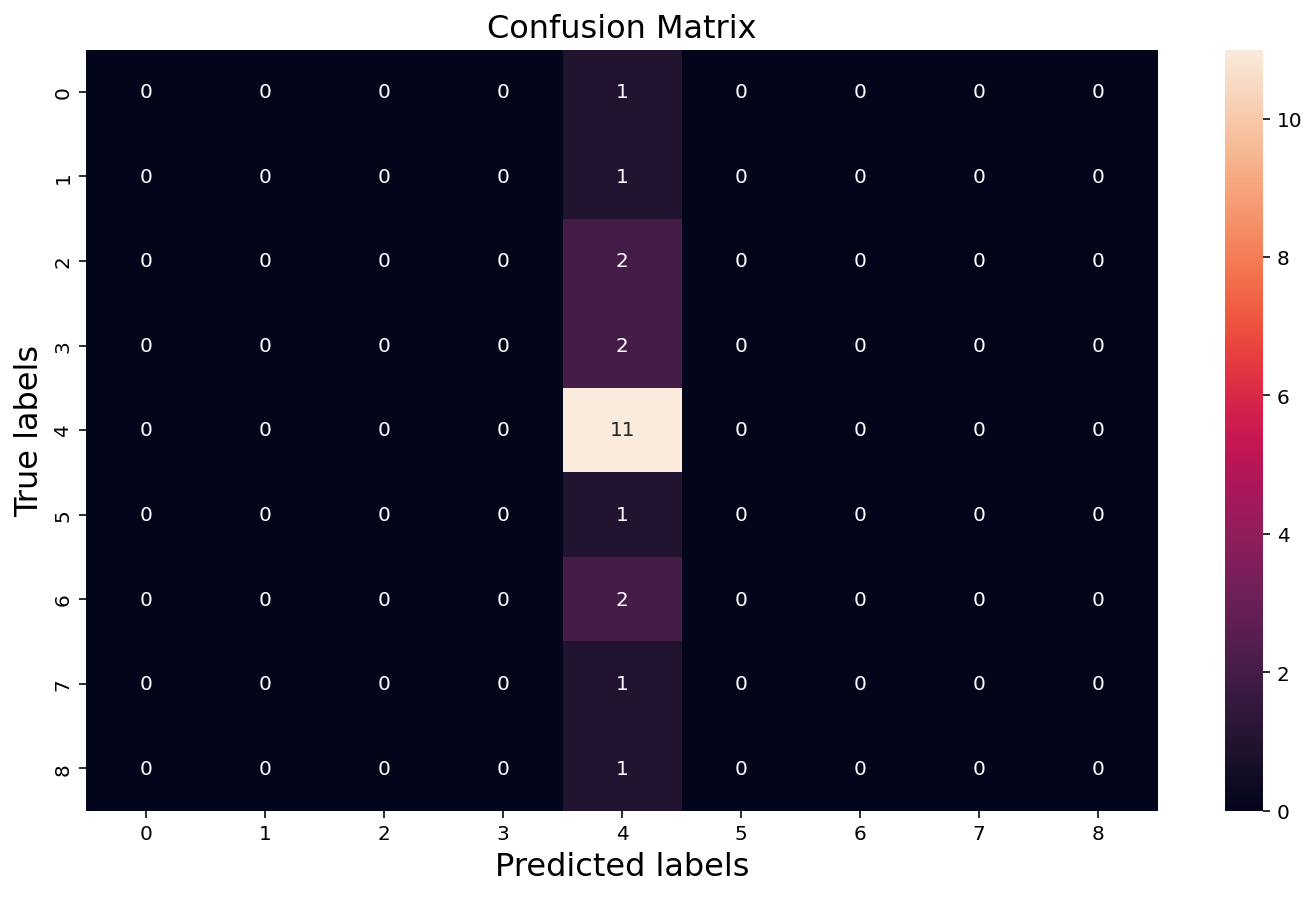

In [52]:
plot_confusion_matrix(y_test, svm_predict)

In [32]:
# Calculating accuracy, precision, and recall for each class
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Define and assign a value to the variable y_RF
svm_predict = knn.predict(X_test)

accuracy4 = accuracy_score(y_test,svm_predict)
precision4 = precision_score(y_test,svm_predict , average='weighted')
recall4 = recall_score(y_test,svm_predict, average='weighted')

print(f"Accuracy: {accuracy4:.4f}")
print(f"Precision: {precision4:.4f}")
print(f"Recall: {recall4:.4f}")

# Additional: Classification report showing precision, recall, f1-score for each class
class_report = classification_report(y_test,svm_predict)
print("\nClassification Report:")
print(class_report) 

Accuracy: 0.3636
Precision: 0.3333
Recall: 0.3636

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           5       0.67      0.73      0.70        11
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1

    accuracy                           0.36        22
   macro avg       0.07      0.07      0.07        22
weighted avg       0.33      0.36      0.35        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWa

In [33]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB

# Create Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train, y_train)

# Make predictions
naive_bayes_predict = naive_bayes.predict(X_test)

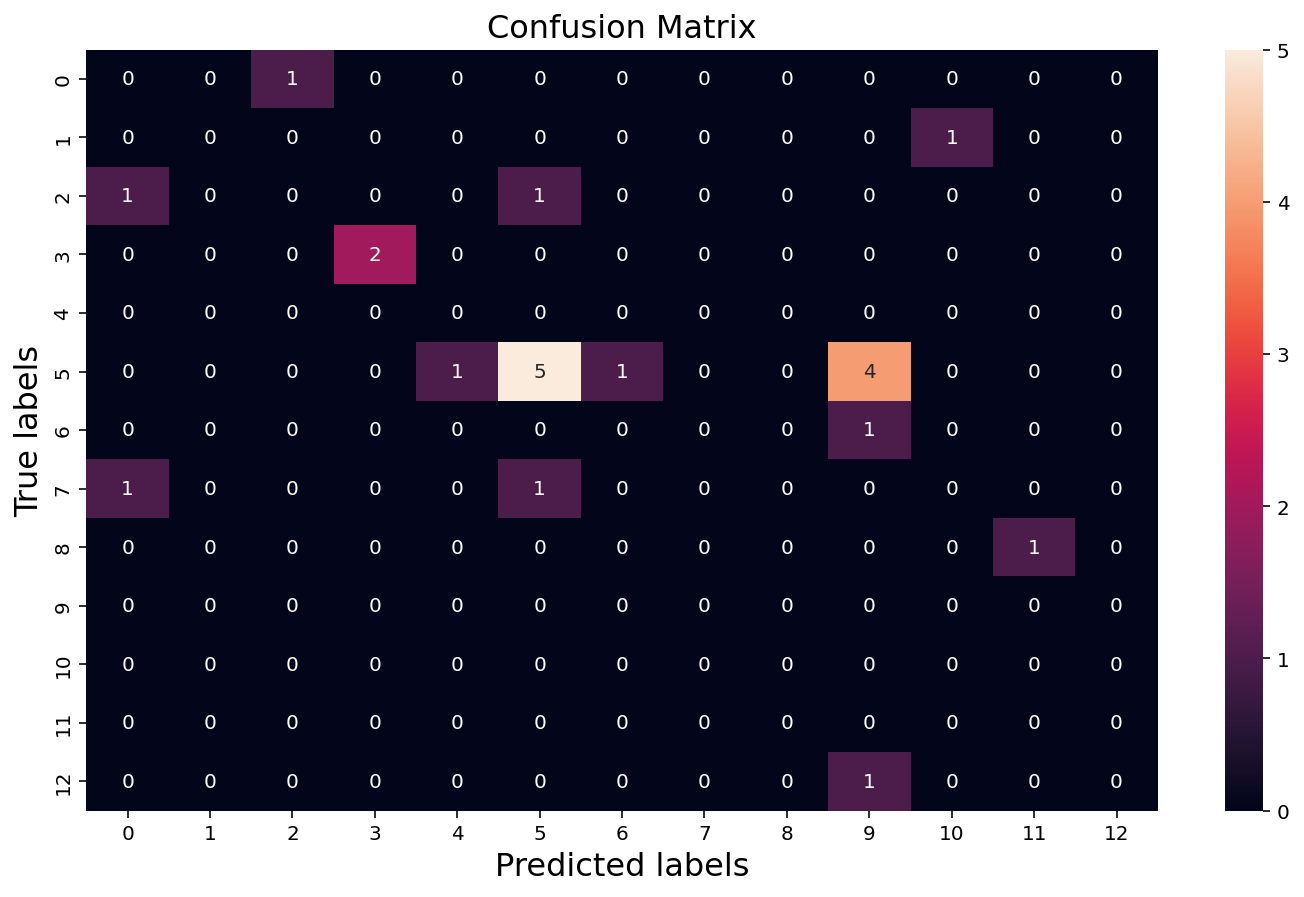

In [55]:
plot_confusion_matrix(y_test, naive_bayes_predict)

In [34]:
# Calculating accuracy, precision, and recall for each class
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Define and assign a value to the variable y_RF
naive_bayes_predict=naive_bayes.predict(X_test)

accuracy5 = accuracy_score(y_test,naive_bayes_predict)
precision5 = precision_score(y_test,naive_bayes_predict , average='weighted')
recall5 = recall_score(y_test,naive_bayes_predict, average='weighted')

print(f"Accuracy: {accuracy5:.4f}")
print(f"Precision: {precision5:.4f}")
print(f"Recall: {recall5:.4f}")

# Additional: Classification report showing precision, recall, f1-score for each class
class_report = classification_report(y_test,naive_bayes_predict)
print("\nClassification Report:")
print(class_report) 

Accuracy: 0.3182
Precision: 0.4481
Recall: 0.3182

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         0
           5       0.71      0.45      0.56        11
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1

    accuracy                           0.32        22
   macro avg       0.13      0.11      0.12        22
weighted avg       0.45      0.32      0.37        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWa

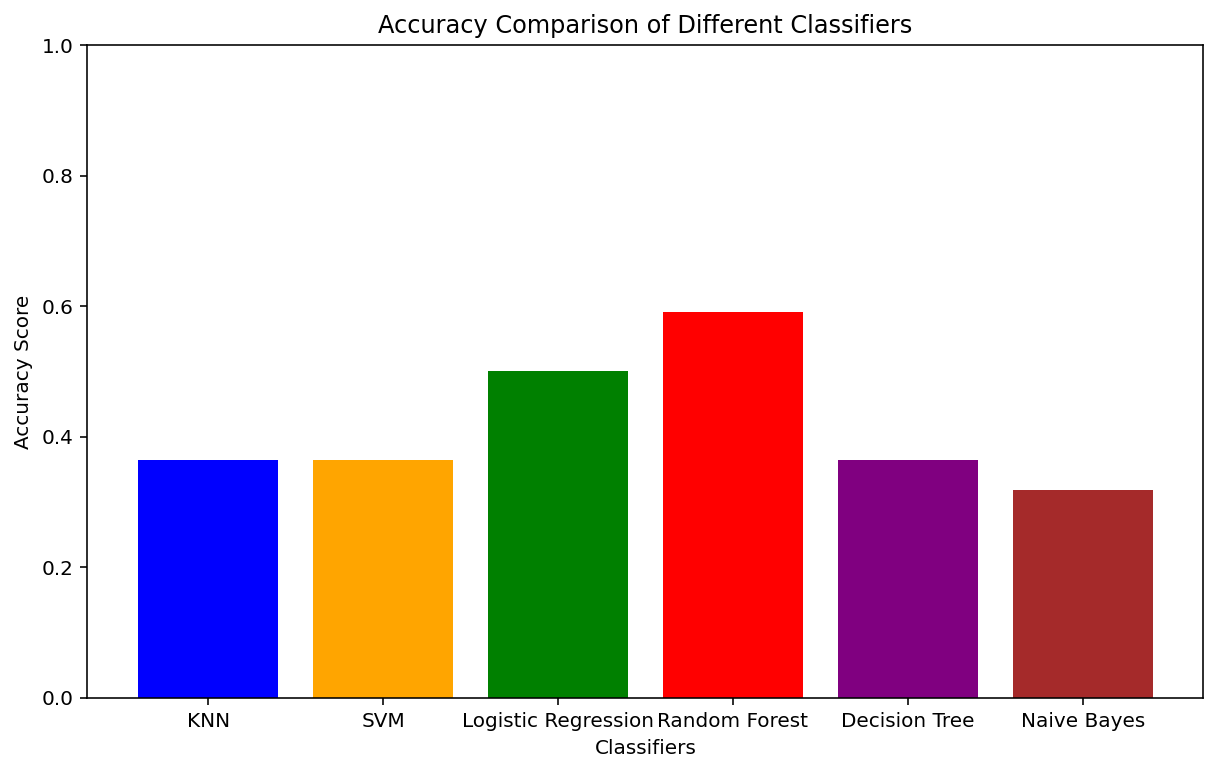

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Assuming you have already trained and predicted with each classifier
# knn_predict, svm_predict, lr_predict, forest_predict, dt_predict, naive_bayes_predict are the predicted labels

# List of classifiers and their predictions
classifiers = ['KNN', 'SVM', 'Logistic Regression', 'Random Forest', 'Decision Tree', 'Naive Bayes']
predictions = [knn_predict, svm_predict, logr_predict, forest_predict, tree_predict, naive_bayes_predict]

# List to store accuracy scores
accuracy_scores = []

# Calculate accuracy for each classifier
for pred in predictions:
    accuracy = accuracy_score(y_test, pred)
    accuracy_scores.append(accuracy)

# Plotting the accuracy graph
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracy_scores, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison of Different Classifiers')
plt.ylim([0, 1])  # Set the y-axis range to be between 0 and 1 for accuracy scores
plt.show()

In [49]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

unsupervised algo



In [57]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('capstone_numeric_output.csv')

In [62]:
# Drop the 'class' column for unsupervised learning
features = df.drop('Learning_Style', axis=1)

In [63]:
# Convert categorical variables to numerical using one-hot encoding
features = pd.get_dummies(features)

In [64]:
# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [70]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=13, random_state=42)
df['KMeans_cluster'] = kmeans.fit_predict(features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [71]:
# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=13)
df['Hierarchical_cluster'] = hierarchical.fit_predict(features_scaled)

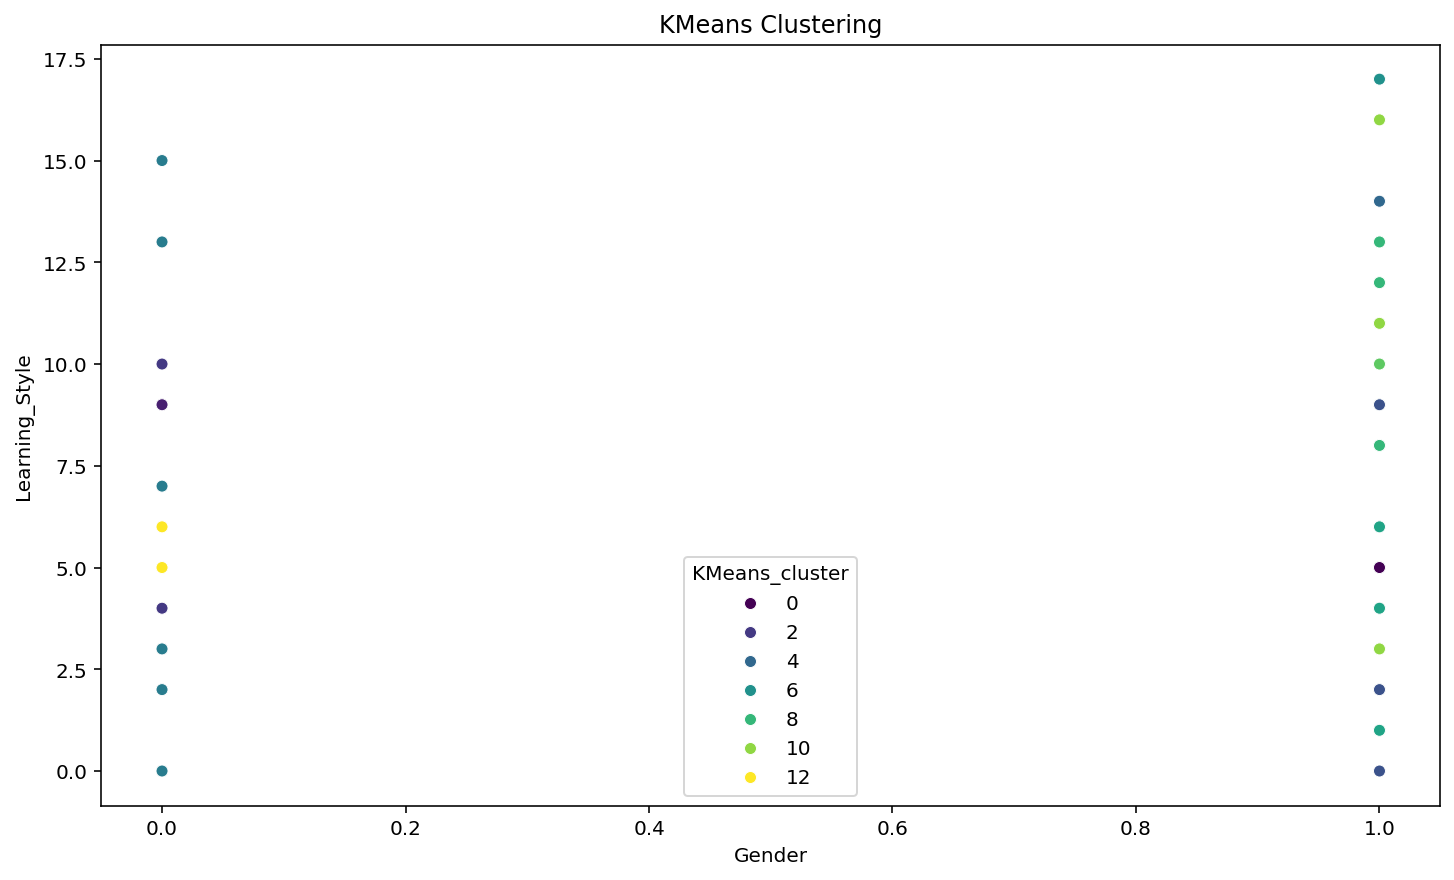

In [74]:
sns.scatterplot(x='Gender', y='Learning_Style', hue='KMeans_cluster', data=df, palette='viridis')
plt.title('KMeans Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


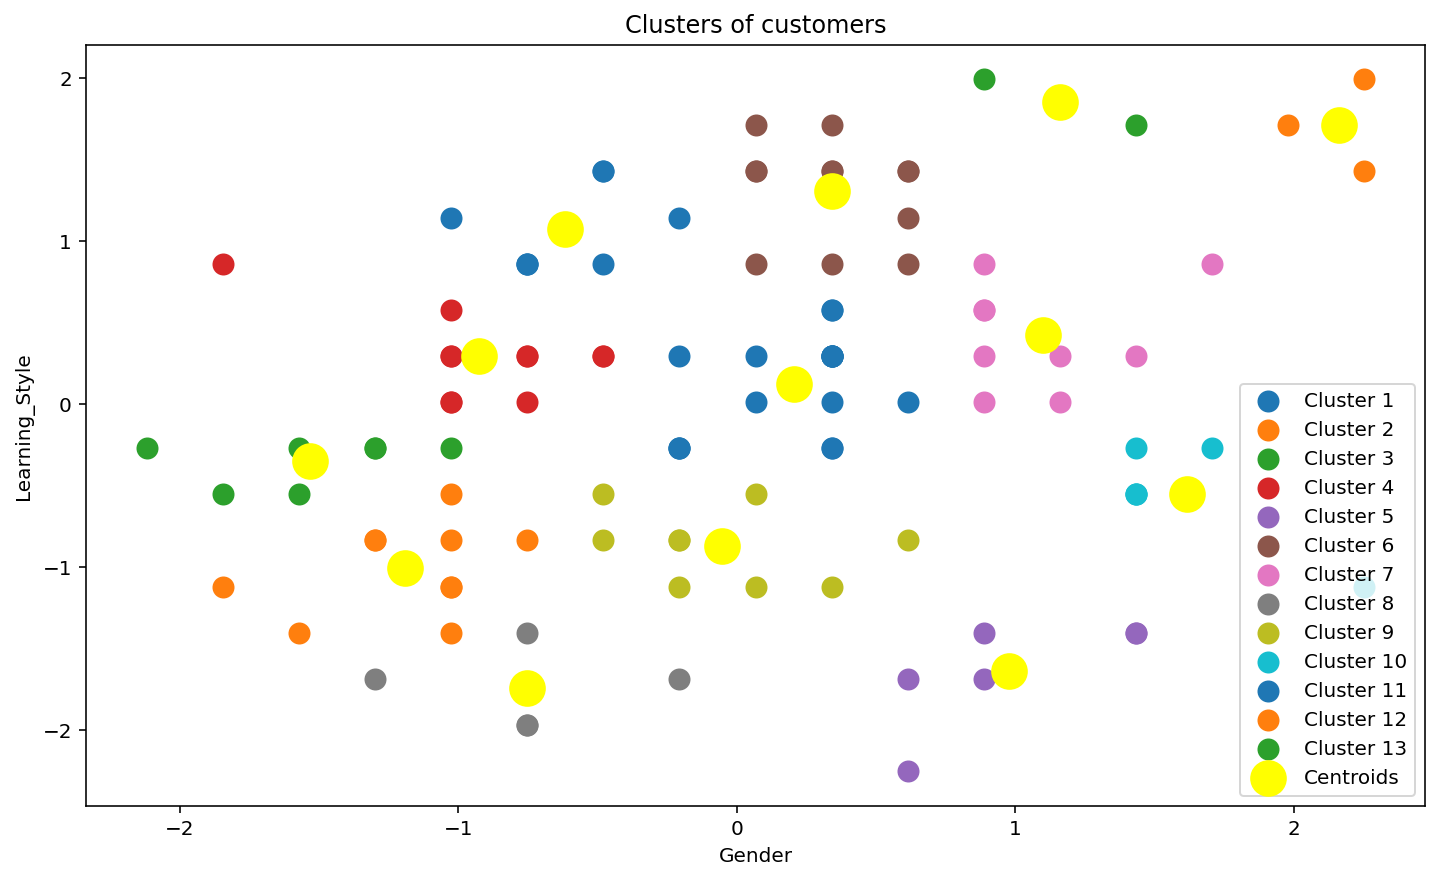

In [4]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('capstone_numeric_output.csv')
X = dataset.iloc[:, [3, 4]].values

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
/

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=13, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters
for i in range(13):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Gender')
plt.ylabel('Learning_Style')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

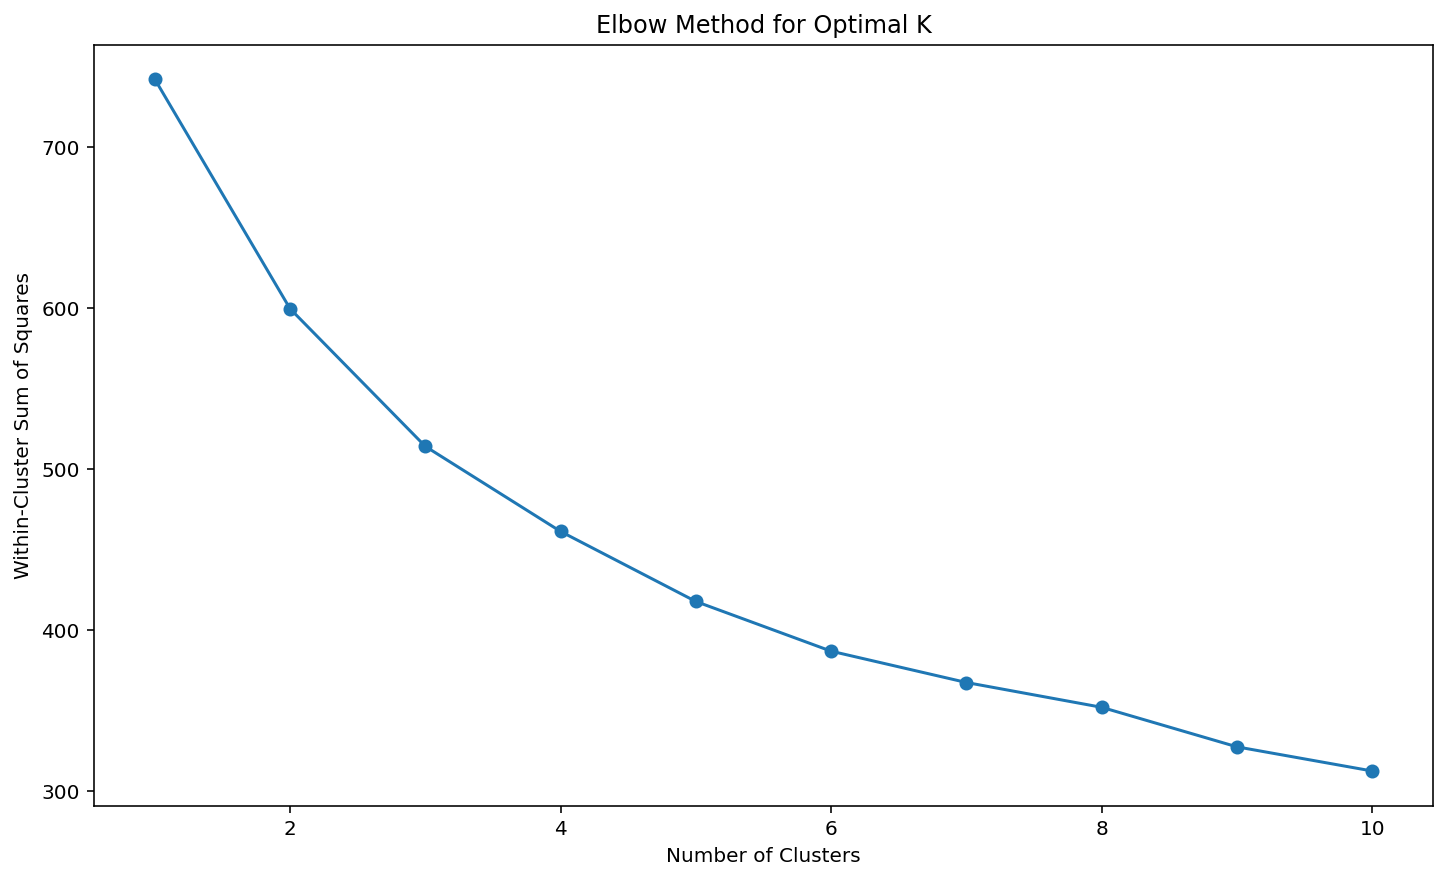

In [94]:
inertia_values = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_scaled)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

In [95]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming you have your dataset loaded in 'features_scaled'

# Apply KMeans clustering
kmeans = KMeans(n_clusters=13, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=13)
hierarchical_labels = hierarchical.fit_predict(features_scaled)

# Calculate silhouette and Davies-Bouldin scores for KMeans
silhouette_kmeans = silhouette_score(features_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(features_scaled, kmeans_labels)

# Calculate silhouette and Davies-Bouldin scores for Hierarchical Clustering
silhouette_hierarchical = silhouette_score(features_scaled, hierarchical_labels)
davies_bouldin_hierarchical = davies_bouldin_score(features_scaled, hierarchical_labels)

# Print the scores
print(f"Silhouette Score (KMeans): {silhouette_kmeans}")
print(f"Davies-Bouldin Index (KMeans): {davies_bouldin_kmeans}")

print(f"\nSilhouette Score (Hierarchical): {silhouette_hierarchical}")
print(f"Davies-Bouldin Index (Hierarchical): {davies_bouldin_hierarchical}")

Silhouette Score (KMeans): 0.176070772440776
Davies-Bouldin Index (KMeans): 1.3222783626978323

Silhouette Score (Hierarchical): 0.18645596326330138
Davies-Bouldin Index (Hierarchical): 1.3155730310149658


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
import ipywidgets as widgets
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming your dataset is named 'dataset' and has the necessary columns
# such as ['Gender', 'SSC (%)', 'HSC/Diploma (%)', 'Visual', 'Aural', 'Read/Write', 'Kinesthetic', 'Learning_Style']

# Assuming X contains the features and y contains the target variable
X = dataset[['Gender', 'SSC (%)', 'HSC/Diploma (%)', 'Visual', 'Aural', 'Read/Write', 'Kinesthetic']]
y = dataset['Learning_Style']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# GUI setup
gender_input = widgets.Dropdown(options=['Male', 'Female'], description="Gender:")
ssc_input = widgets.FloatText(description="SSC (%):")
hsc_input = widgets.FloatText(description="HSC/Diploma (%):")
visual_input = widgets.FloatText(description="Visual:")
aural_input = widgets.FloatText(description="Aural:")
read_write_input = widgets.FloatText(description="Read/Write:")
kinesthetic_input = widgets.FloatText(description="Kinesthetic:")

predict_button = widgets.Button(description="Predict Learning Style")
result_label = widgets.Label()

def predict_learning_style(_):
    gender = gender_input.value
    ssc = ssc_input.value
    hsc = hsc_input.value
    visual = visual_input.value
    aural = aural_input.value
    read_write = read_write_input.value
    kinesthetic = kinesthetic_input.value
    
    # Make prediction using the trained model
    predicted_learning_style = model.predict([[gender, ssc, hsc, visual, aural, read_write, kinesthetic]])[0]
    result_label.value = f"Predicted Learning Style: {predicted_learning_style}"

predict_button.on_click(predict_learning_style)

# Display widgets
display(gender_input, ssc_input, hsc_input, visual_input, aural_input, read_write_input, kinesthetic_input,
        predict_button, result_label)


KeyError: "['Kinesthetic'] not in index"

In [36]:
import ipywidgets as widgets
import pandas as pd
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('capstone_numeric_output.csv')
X=dataset.drop(["Learning_Style"],axis=1).values
y=dataset["Learning_Style"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
# Train the linear regression model
model = RandomForestClassifier()
model.fit(X_train, y_train)

Visual_input = widgets.FloatText(description="Visual:")
Aural_input = widgets.FloatText(description="Aural:")
Read_Write_input = widgets.FloatText(description="Read_Write:")
Kinesthetic_input = widgets.FloatText(description="Kinesthetic:")

predict_button = widgets.Button(description="Predict Learning Style")
result_label = widgets.Label()

def predict_Learning_Style(_):
    features = {
    'Visual': Visual_input.value,
    'Aural': Aural_input.value,
    'Read_Write': Read_Write_input.value,
    'Kinesthetic': Kinesthetic_input.value
    }
    learning_style = max(features, key=lambda x: features[x])
    predicted_Learning_Style = model.predict([list(features.values())])
    result_label.value = f"Predicted Learning_Style: {predicted_Learning_Style[0]}"

predict_button.on_click(predict_Learning_Style)

display(Visual_input, Aural_input, Read_Write_input, Kinesthetic_input, predict_button, result_label)

FloatText(value=0.0, description='Visual:')

FloatText(value=0.0, description='Aural:')

FloatText(value=0.0, description='Read_Write:')

FloatText(value=0.0, description='Kinesthetic:')

Button(description='Predict Learning Style', style=ButtonStyle())

Label(value='')